# Lateral-torsional Rayleigh-Ritz equations

In [1]:
import numpy as np
from sympy import *
from bikewheelcalc import BicycleWheel
from IPython.display import display

init_printing()

In [2]:
# setup symbols
s = symbols('s', real=true)

# deformation
u = Function('u')
v = Function('v')
w = Function('w')
phi = Function('phi')

# Applied load
P = symbols('P', real=True)

# rim properties
R, EA, EI1, EI2, GJ, EIw, mu, rx, ry, y0 = symbols('R EA EI_1 EI_2 GJ EI_w mu r_x r_y y_0',
                                                   real=true, finite=true,
                                                   positive=true)

t = symbols('t', real=true)  # Average net radial pull per unit length

# spoke properties
ns = symbols('n_s', integer=true, positive=true)
T, EA, ls, alpha = symbols('T, EA, l, alpha', real=true, positive=true)
k_uu, k_vv, k_ww, k_pp = symbols('k_uu k_vv k_ww, k_{\phi\phi}', real=true)
k_uv, k_uw, k_up, k_vw, k_vp, k_wp = symbols('k_uv k_uw k_{u\phi} k_vw k_{v\phi} k_{w\phi}', real=true)

sub_no_k = [(k_uu, 0), (k_vv, 0), (k_ww, 0), (k_pp, 0),
            (k_uv, 0), (k_uw, 0), (k_up, 0), (k_vw, 0), (k_vp, 0), (k_wp, 0)]

# No coupling terms between v-w and u-phi
sub_ij = [(k_uv, 0), (k_uw, 0), (k_vp, 0), (k_wp, 0)]

## Curvatures and total potential

In [3]:
# curvatures
n = symbols('n', real=True, integer=True)
un, pn = symbols('u_n phi_n', real=True)
u = un*cos(n*s/R)
phi = pn*cos(n*s/R)

# Curvatures
k_2 = u.diff(s, 2) - phi/R
k_3 = u.diff(s)/R + phi.diff(s)

u_rim = (EI2*k_2**2 + GJ*k_3**2 + EIw*(k_3.diff(s))**2)/2

u_spokes = (k_uu*u**2 + 2*k_up*u*phi + k_pp*phi**2)/2

v_rim = R*t*(u.diff(s)**2 + rx**2*phi.diff(s)**2 +
         ry**2*(u.diff(s)/R - phi.diff(s))**2 +
         y0*(2*u.diff(s, 2)*phi.diff(s) - phi**2/R) +
         y0**2*phi.diff(s)**2)/2

PI = (integrate(u_rim + u_spokes - v_rim, (s, 0, 2*pi*R)).simplify()) - P*un

sub_r2 = [(rx**2, 0), (ry**2, 0), (y0**2, 0)]
PI = PI.subs(sub_r2)

## Rayleigh-Ritz equations

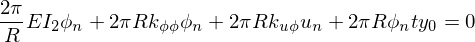

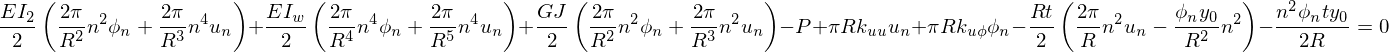

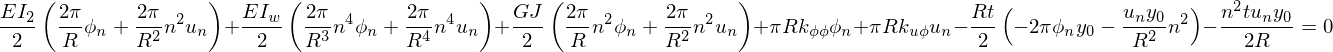

In [4]:
n_pos = symbols('n', real=True, integer=True, positive=True)
rr_eqns = [Eq(PI.subs(n, 0).diff(un)), Eq(PI.subs(n, 0).diff(pn)),
           Eq(PI.subs(n, n_pos).diff(un)), Eq(PI.subs(n, n_pos).diff(pn))]

display(rr_eqns[0])
display(rr_eqns[1])
display(rr_eqns[2])
display(rr_eqns[3])

## Solution

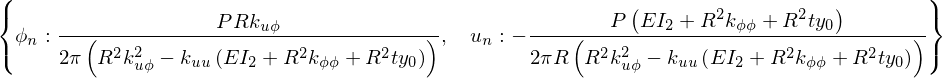

In [5]:
s0 = solve(rr_eqns[0:2], (un, pn))

s0

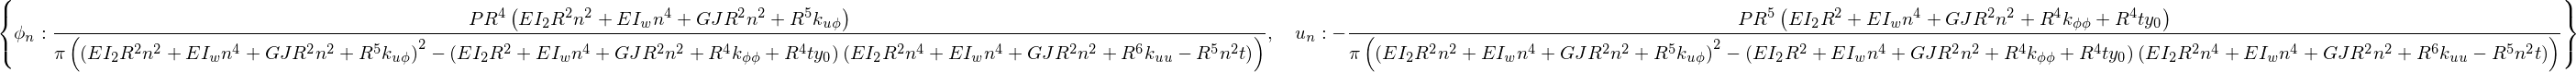

In [6]:
sn = solve(rr_eqns[2:4], (un, pn))

sn